# Trabalho de Inteligência artificial
Aluno: Bruna Scafutto - 800365

### **Base de dados escolhida**: Dados sobre a estimativa de níveis de obesidade em indivíduos dos países do México, Peru e Colombia, baseado em seus hábitos de alimentação e condição físicas

In [14]:
#importar numpy para trabalhar com matrizes e pandas para ler dados no formato frame
import numpy as np
import pandas as pd

#importar o pacote datasets do scikit-learn para carregar conjuntos de dados
from sklearn import datasets

#importar KMeans para fazer o agrupamento
from sklearn.cluster import KMeans

#importar o módulo pyplot para plotar o gráfico no método do cotovelo
import matplotlib.pyplot as plt


##**Classe**:
NObeysdad (nível de obesidade)

##**Atributos**:


*   Gender
*   Age
*   Height
*   Weight
*   Family_history_with_overweight
*   FAVC (se come comida calórica frequentemente)
*   FCVC (se costuma comer vegetais)
*   NCP  (número de refeições por mês)
*   CAEC (se come come algo durante as refeições)
*   SMOKE (se fuma)
*   CH20 (quantidade de água consumida diariamente)
*   SCC (se monitora a quantidade de água consumida diariamente)
*   FAF (com qual frequência pratica atividades físicas)
*   TUE (quanto tempo usa telas)
*   CALC (frequência de consumo de álcool)
*   MTRANS (meio de transporte usual)


In [16]:
#Leitura da base de dados:
data = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
#Retirar classe
data_drop_class = data.drop(['NObeyesdad'], axis=1)
data_drop_class.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


Transformações dos atributos categóricos em binários e normalização dos atributos contínuos

In [18]:
from sklearn.preprocessing import MinMaxScaler

#Separação dos tipos de dados
categorical_features = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
continuous_features = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

#Transformação dos atributos categoricos em binário
data_drop_class = pd.get_dummies(data_drop_class, columns = categorical_features);
data_drop_class.head()

#Normalização dos atributos contínuos e inteiros
mms = MinMaxScaler()
mms.fit(data_drop_class)
data_transformed = mms.transform(data_drop_class)
data_transformed = pd.DataFrame(data_transformed)
data_transformed.head()


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# K-Means
Aplicação o algoritmo k-means no conjunto de dados sem a classe definindo o número de grupos como
o número de classes do conjunto de dados;

#Índices de validação
Aplicação dos ídices de validação do algorítmo k-means tendo o número de grupos igual o número de classes

In [19]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

#Definição do número de clusters
clusters_number = len(data['NObeyesdad'].unique())
print("Número de grupos:", clusters_number)

#Aplicação do Kmeans
kmeans = KMeans(n_clusters=clusters_number, random_state=42)
kmeans.fit(data_transformed)
saida_prevista = kmeans.labels_

# Rótulos previstos:
print("\nRótulos previstos pelo K-means")
print(saida_prevista)

#Rótulos reais
print("\nRótulos reais")
print(data['NObeyesdad'].values)

# Aplicação dos índices de validação
ari_score = adjusted_rand_score(data['NObeyesdad'], saida_prevista)
ami_score = adjusted_mutual_info_score(data['NObeyesdad'], saida_prevista)


print("\nÍndices de validação:")
print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Adjusted Mutual Information (AMI): {ami_score}")

Número de grupos: 7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Rótulos previstos pelo K-means
[2 5 0 ... 5 5 5]

Rótulos reais
['Normal_Weight' 'Normal_Weight' 'Normal_Weight' ... 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_III']

Índices de validação:
Adjusted Rand Index (ARI): 0.21956557027698714
Adjusted Mutual Information (AMI): 0.2680468483259851


# A seguir, foram feitos os seguintes passos:

* Definição de um intervalo de valores para número de grupos **(K)**

* Aplicação do **algoritmo k-means** no conjunto de dados para todos os valores do intervalo

* Coleta dos valores de soma dos quadrados das distância para cada valor de K
* Coletar o valor do índice de validação silhueta

In [30]:
from sklearn.metrics import silhouette_score

#Definição do intervalo
K = range(2,20)

#Soma dos quadrados da distancia e  valores de silhueta
Sum_of_squared_distances = []
silhouette_values = []
#Para cada valor de K no intervalo
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)

    # Valor de soma quadrática das distâncias
    Sum_of_squared_distances.append(km.inertia_)

    #Valor de silhueta
    silhouette_values.append(silhouette_score(data_transformed, km.labels_))


print("Soma dos quadrados das distâncias:", Sum_of_squared_distances)
print("Indices de silhoueta:", silhouette_values )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Soma dos quadrados das distâncias: [4709.403107662226, 4172.535088014473, 3750.260414048029, 3372.89031344087, 3150.00152136322, 2965.875806733037, 2744.9687728896874, 2607.8533236132425, 2489.0334876246543, 2392.237817107988, 2324.6349216612516, 2242.359895783723, 2131.806223780148, 2102.0645358398597, 2036.3741152517014, 2013.5068239051707, 1955.5523194329626, 1912.5592707978217]
Indices de silhoueta: [0.2158070425045602, 0.21329327356171754, 0.22576554175798086, 0.22519455593586732, 0.25312460739098874, 0.26741173258481404, 0.291454583857214, 0.30823951463226795, 0.3188786206337102, 0.32367603541252726, 0.3297674447506059, 0.2790521633906608, 0.35097509118032644, 0.30469223421041564, 0.3568484688306611, 0.36051211168231806, 0.3086069948117062, 0.2776648482604415]


### Plotagem do  o gráfico dos índices erro quadrático encontrados para cada número de grupos
Analisando-se o gráfico plotado é possivel perceber que com o índice k=9, ou seja, escolhendo-se 9 grupos é possível observar uma saída satifatória

<ipython-input-31-b46ccb4caa56>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(K, Sum_of_squared_distances, 'bx-', marker='o')


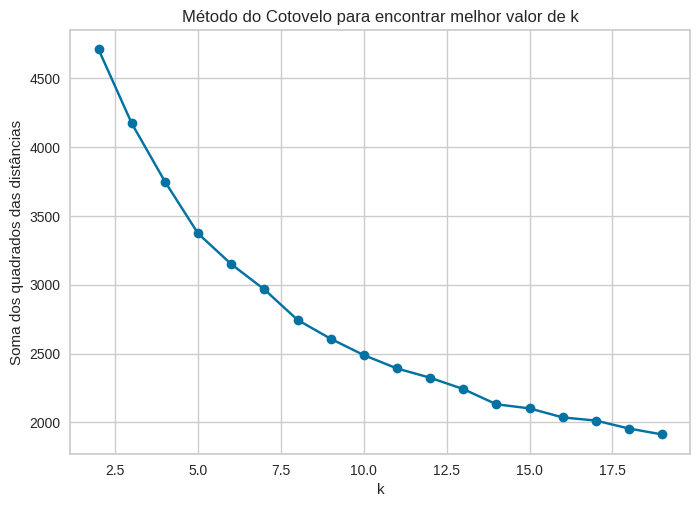

In [31]:
plt.plot(K, Sum_of_squared_distances, 'bx-', marker='o')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

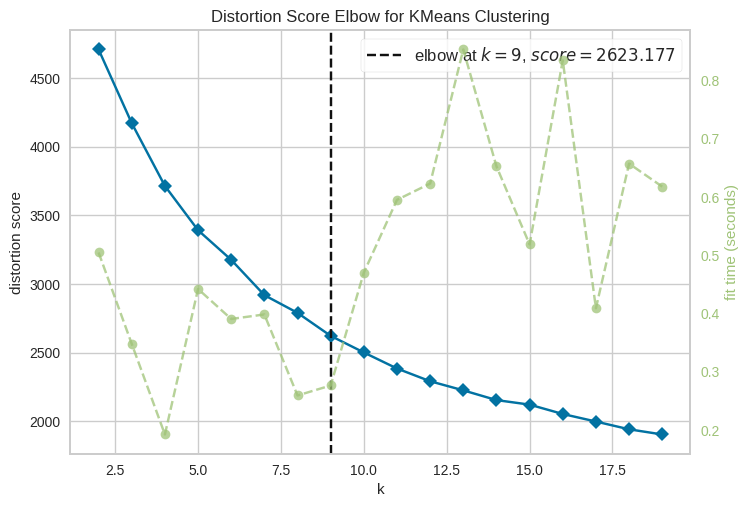

In [46]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(data_transformed)
visualizer.show();

### Plotagem do gráfico dos índices de silhueta encontrados para cada número de grupos

A partir desse gráfico, confirma-se o valor de k= 9 encontrado no gráfico acima


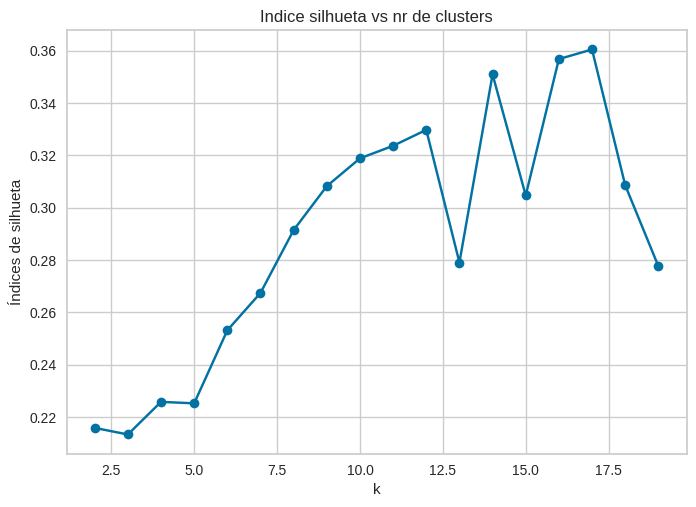

In [48]:
plt.plot(K, silhouette_values, marker='o')
plt.xlabel('k')
plt.ylabel('Índices de silhueta')
plt.title('Indice silhueta vs nr de clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

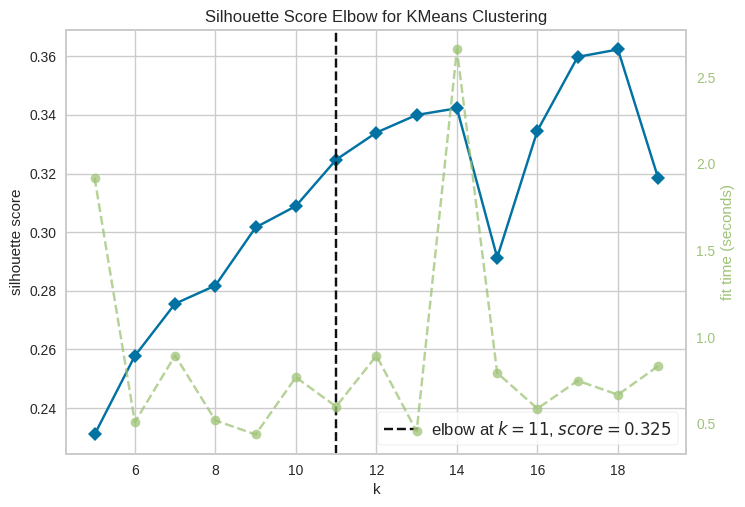

In [50]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(5,20),metric='silhouette')
visualizer.fit(data_transformed)
visualizer.show();

Observando-se os índices de silhueta, e suas distorções, o valor de número ideal de grupos encontrado por esse segundo método foi k=11.

Ainda que próximo ao valor encontrado pelo primeiro método (K = 9), observa-se que o valor do índice ainda se encontra muito baixo (cerca de 0.33), mesmo com número de grupos grandes, o que nos ajuda a perceber que provavelmente a divisão desse banco de dados em clusters talvez não seja ideal.